In [1]:
import pandas as pd
from datetime import datetime

## NVDA (NVIDIA) Stock Data Cleaning and Preparation

In [2]:
#import csv file
nvda_stock=pd.read_csv("NVDA.csv")

In [3]:
nvda_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,14.851000,14.996000,14.096000,14.315000,14.306805,401277000
1,2023-01-04,14.567000,14.853000,14.241000,14.749000,14.740556,431324000
2,2023-01-05,14.491000,14.564000,14.148000,14.265000,14.256833,389168000
3,2023-01-06,14.474000,15.010000,14.034000,14.859000,14.850493,405044000
4,2023-01-09,15.284000,16.056000,15.141000,15.628000,15.619054,504231000
...,...,...,...,...,...,...,...
366,2024-06-18,131.139999,136.330002,130.690002,135.580002,135.580002,294335100
367,2024-06-20,139.800003,140.759995,129.520004,130.779999,130.779999,517768400
368,2024-06-21,127.120003,130.630005,124.300003,126.570000,126.570000,655484700
369,2024-06-24,123.239998,124.459999,118.040001,118.110001,118.110001,476060900


In [4]:
nvda_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       371 non-null    object 
 1   Open       371 non-null    float64
 2   High       371 non-null    float64
 3   Low        371 non-null    float64
 4   Close      371 non-null    float64
 5   Adj Close  371 non-null    float64
 6   Volume     371 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.4+ KB


## Converting 'Date' Column to Datetime Format in NVDA Stock DataFrame

In [5]:
nvda_stock['Date']=pd.to_datetime(nvda_stock['Date'])

In [6]:
nvda_stock.set_index('Date', inplace=True)

In [7]:
nvda_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,14.851000,14.996000,14.096000,14.315000,14.306805,401277000
2023-01-04,14.567000,14.853000,14.241000,14.749000,14.740556,431324000
2023-01-05,14.491000,14.564000,14.148000,14.265000,14.256833,389168000
2023-01-06,14.474000,15.010000,14.034000,14.859000,14.850493,405044000
2023-01-09,15.284000,16.056000,15.141000,15.628000,15.619054,504231000
...,...,...,...,...,...,...
2024-06-18,131.139999,136.330002,130.690002,135.580002,135.580002,294335100
2024-06-20,139.800003,140.759995,129.520004,130.779999,130.779999,517768400
2024-06-21,127.120003,130.630005,124.300003,126.570000,126.570000,655484700


## NVDA Stock Close Price Time Series Analysis

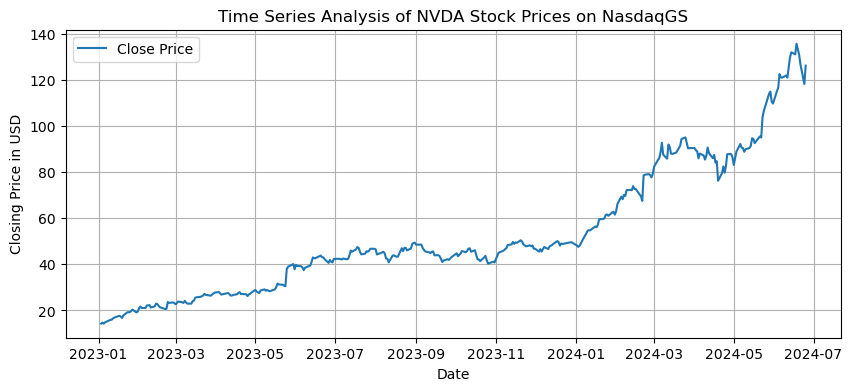

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(nvda_stock.index, nvda_stock['Close'], label='Close Price')
plt.title('Time Series Analysis of NVDA Stock Prices on NasdaqGS')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.grid()
plt.legend()
plt.show()

# Correlation Analysis

## Merging Sentiment Data and NVDA Stock

In [9]:
#import OPENAI and NVDA sentiment 
nvda_sentiment=pd.read_csv("nvda_sentiment.csv")
tsmc_sentiment=pd.read_csv("tsmc_sentiment.csv")
openai_sentiment=pd.read_csv("openai_sentiment.csv")

In [10]:
nvda_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       156 non-null    object
 1   score      156 non-null    int64 
 2   sentiment  156 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.8+ KB


In [11]:
tsmc_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       316 non-null    object
 1   score      316 non-null    int64 
 2   sentiment  316 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.5+ KB


In [12]:
openai_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       395 non-null    object
 1   score      395 non-null    int64 
 2   sentiment  395 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.4+ KB


In [13]:
#change Date column from object to datetime format
nvda_sentiment['Date']=pd.to_datetime(nvda_sentiment['Date'])
tsmc_sentiment['Date']=pd.to_datetime(tsmc_sentiment['Date'])
openai_sentiment['Date']=pd.to_datetime(openai_sentiment['Date'])

In [14]:
# merge stock dataframe and all sentiment dataframe into one
merged_all=pd.merge(nvda_stock, nvda_sentiment, on='Date', how='left', suffixes=('', '_nvda_sentiment') )
merged_all=pd.merge(merged_all, tsmc_sentiment, on='Date', how='left', suffixes=('', '_tsmc_sentiment'))
merged_all=pd.merge(merged_all, openai_sentiment, on='Date', how='left', suffixes=('', '_openai_sentiment'))

In [15]:
merged_all.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,score,sentiment,score_tsmc_sentiment,sentiment_tsmc_sentiment,score_openai_sentiment,sentiment_openai_sentiment
0,2023-01-03,14.851,14.996,14.096,14.315,14.306805,401277000,NaN,NaN,6.0,positive,3.0,neutral
1,2023-01-04,14.567,14.853,14.241,14.749,14.740556,431324000,NaN,NaN,1.0,neutral,1.0,positive
2,2023-01-05,14.491,14.564,14.148,14.265,14.256833,389168000,NaN,NaN,NaN,NaN,8.0,neutral
3,2023-01-06,14.474,15.010,14.034,14.859,14.850493,405044000,NaN,NaN,NaN,NaN,9.0,neutral
4,2023-01-09,15.284,16.056,15.141,15.628,15.619054,504231000,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# rename columns
merged_all.rename(columns=
                   {
                       'score':"nvda_score",
                       'sentiment':'nvda_sentiment',
                       'score_tsmc_sentiment':'tsmc_score',
                       'sentiment_tsmc_sentiment':'tsmc_sentiment',
                       'score_openai_sentiment': 'openai_score',
                       'sentiment_openai_sentiment': 'openai_sentiment'
                   }, inplace=True)

merged_all.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,nvda_score,nvda_sentiment,tsmc_score,tsmc_sentiment,openai_score,openai_sentiment
0,2023-01-03,14.851,14.996,14.096,14.315,14.306805,401277000,NaN,NaN,6.0,positive,3.0,neutral
1,2023-01-04,14.567,14.853,14.241,14.749,14.740556,431324000,NaN,NaN,1.0,neutral,1.0,positive
2,2023-01-05,14.491,14.564,14.148,14.265,14.256833,389168000,NaN,NaN,NaN,NaN,8.0,neutral
3,2023-01-06,14.474,15.010,14.034,14.859,14.850493,405044000,NaN,NaN,NaN,NaN,9.0,neutral
4,2023-01-09,15.284,16.056,15.141,15.628,15.619054,504231000,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Save data frome into csv file
merged_all.to_csv('stock_allsentiment_dataset.csv', index=False)

# Pearson's Correlation 

In [18]:
# Calculate correlations
correlations = merged_all[['High','Low','Close', 'nvda_score', 'tsmc_score', 'openai_score']].corr()

correlations

,High,Low,Close,nvda_score,tsmc_score,openai_score
High,1.000000,0.999398,0.999237,0.065883,0.091979,0.386661
Low,0.999398,1.000000,0.999561,0.064444,0.090081,0.388385
Close,0.999237,0.999561,1.000000,0.065123,0.090012,0.389872
nvda_score,0.065883,0.064444,0.065123,1.000000,-0.041054,0.200757
tsmc_score,0.091979,0.090081,0.090012,-0.041054,1.000000,0.083622
openai_score,0.386661,0.388385,0.389872,0.200757,0.083622,1.000000


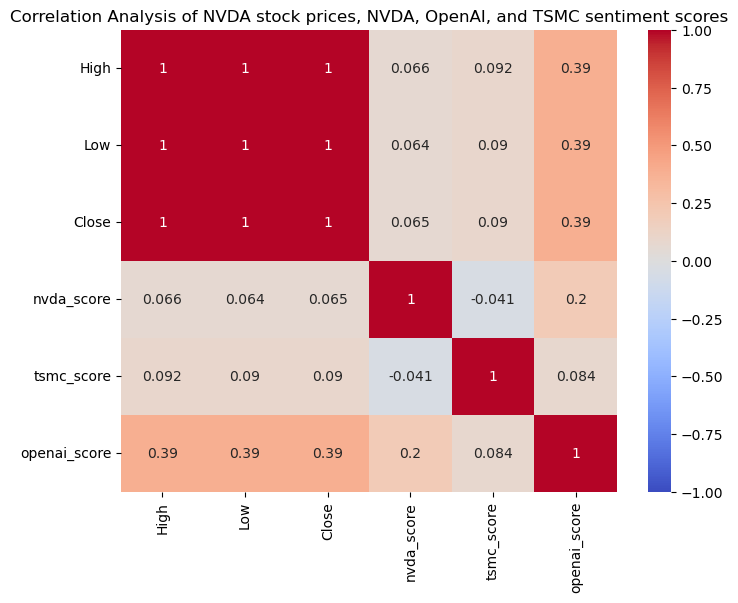

In [19]:
import seaborn as sns

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Analysis of NVDA stock prices, NVDA, OpenAI, and TSMC sentiment scores")
plt.show()

# Spearman Correlation

In [20]:
#import merged data
data=pd.read_csv("stock_allsentiment_dataset.csv")

data.dropna(inplace=True)

data

,Date,Open,High,Low,Close,Adj Close,Volume,nvda_score,nvda_sentiment,tsmc_score,tsmc_sentiment,openai_score,openai_sentiment
101,2023-05-30,40.595001,41.938000,39.949001,40.111000,40.094849,923401000,398.0,neutral,1.0,neutral,301.0,neutral
155,2023-08-16,44.520000,44.674999,43.405998,43.486000,43.472984,527451000,7.0,positive,8.0,positive,162.0,neutral
165,2023-08-30,49.043999,49.926998,48.424999,49.264000,49.249252,735206000,2.0,positive,2.0,neutral,292.0,neutral
195,2023-10-12,46.777000,47.609001,46.330002,46.945000,46.934814,481325000,1.0,positive,682.0,neutral,2.0,neutral
217,2023-11-13,48.320000,49.116001,48.098999,48.619999,48.609447,384136000,2068.0,neutral,6.0,neutral,9.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400,8.0,positive,2.0,negative,611.0,neutral
365,2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400,313.0,positive,180.0,neutral,828.0,neutral
366,2024-06-18,131.139999,136.330002,130.690002,135.580002,135.580002,294335100,639.0,neutral,473.0,neutral,41.0,neutral
367,2024-06-20,139.800003,140.759995,129.520004,130.779999,130.779999,517768400,260.0,positive,172.0,neutral,33.0,neutral


In [23]:
# implemnt Spreaman correlation 
from scipy.stats import spearmanr


# Calculate Spearman correlation
corr_nvda, _ = spearmanr(data['Close'], data['nvda_score'])
corr_tsmc, _ = spearmanr(data['Close'], data['tsmc_score'])
corr_openai, _ = spearmanr(data['Close'], data['openai_score'])

# Print correlation results
print(f'Spearman Correlation (NVIDIA Sentiment vs NVDA Stock): {corr_nvda}')
print(f'Spearman Correlation (TSMC Sentiment vs NVDA Stock): {corr_tsmc}')
print(f'Spearman Correlation (OpenAI Sentiment vs NVDA Stock): {corr_openai}')

Spearman Correlation (NVIDIA Sentiment vs NVDA Stock): 0.3017307233977984
Spearman Correlation (TSMC Sentiment vs NVDA Stock): 0.0791739791870771
Spearman Correlation (OpenAI Sentiment vs NVDA Stock): 0.3935289721020057


# Granger Causality Test

In [256]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

data.sort_values(by='Date', inplace=True)

# Check if the data is stationary
from statsmodels.tsa.stattools import adfuller

def adf_test(series, signif=0.05):
    result = adfuller(series)
    p_value = result[1]
    if p_value < signif:
        return True
    else:
        return False

print(f"Close stationary: {adf_test(data['Close'])}")
print(f"NVIDIA sentiment stationary: {adf_test(data['nvda_score'])}")
print(f"TSMC sentiment stationary: {adf_test(data['tsmc_score'])}")
print(f"OpenAI sentiment stationary: {adf_test(data['openai_score'])}")

# Differencing if needed to make the data stationary
data['Close_diff'] = data['Close'].diff().dropna()
data['nvda_score_diff'] = data['nvda_score'].diff().dropna()
data['tsmc_score_diff'] = data['tsmc_score'].diff().dropna()
data['openai_score_diff'] = data['openai_score'].diff().dropna()

# Drop NA values after differencing
data.dropna(inplace=True)

Close stationary: False
NVIDIA sentiment stationary: True
TSMC sentiment stationary: True
OpenAI sentiment stationary: True


In [264]:
max_lag = 3

# NVIDIA sentiment and NVDA stock price
print('Granger Causality Test: NVDA sentiment and NVDA stock price')
granger_nvda = grangercausalitytests(data[['Close_diff', 'nvda_score_diff']], max_lag, verbose=True)


Granger Causality Test: NVDA sentiment and NVDA stock price

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7940  , p=0.0995  , df_denom=64, df_num=1
ssr based chi2 test:   chi2=2.9250  , p=0.0872  , df=1
likelihood ratio test: chi2=2.8629  , p=0.0906  , df=1
parameter F test:         F=2.7940  , p=0.0995  , df_denom=64, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5372  , p=0.2232  , df_denom=61, df_num=2
ssr based chi2 test:   chi2=3.3263  , p=0.1895  , df=2
likelihood ratio test: chi2=3.2452  , p=0.1974  , df=2
parameter F test:         F=1.5372  , p=0.2232  , df_denom=61, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9629  , p=0.4164  , df_denom=58, df_num=3
ssr based chi2 test:   chi2=3.2375  , p=0.3564  , df=3
likelihood ratio test: chi2=3.1594  , p=0.3677  , df=3
parameter F test:         F=0.9629  , p=0.4164  , df_denom=58, df_num=3


/Users/sailone/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [266]:
# OpenAI sentiment and NVDA stock price
print('Granger Causality Test: OpenAI sentiment and NVDA stock price')
granger_openai = grangercausalitytests(data[['Close_diff', 'openai_score_diff']], max_lag, verbose=True)


Granger Causality Test: OpenAI sentiment and NVDA stock price

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6210  , p=0.0616  , df_denom=64, df_num=1
ssr based chi2 test:   chi2=3.7907  , p=0.0515  , df=1
likelihood ratio test: chi2=3.6874  , p=0.0548  , df=1
parameter F test:         F=3.6210  , p=0.0616  , df_denom=64, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0702  , p=0.0536  , df_denom=61, df_num=2
ssr based chi2 test:   chi2=6.6437  , p=0.0361  , df=2
likelihood ratio test: chi2=6.3302  , p=0.0422  , df=2
parameter F test:         F=3.0702  , p=0.0536  , df_denom=61, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7513  , p=0.0507  , df_denom=58, df_num=3
ssr based chi2 test:   chi2=9.2502  , p=0.0261  , df=3
likelihood ratio test: chi2=8.6485  , p=0.0343  , df=3
parameter F test:         F=2.7513  , p=0.0507  , df_denom=58, df_num=3


/Users/sailone/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [265]:
# TSMC sentiment and NVDA stock price
print('Granger Causality Test: TSMC sentiment and NVDA stock price')
granger_tsmc = grangercausalitytests(data[['Close_diff', 'tsmc_score_diff']], max_lag, verbose=True)


Granger Causality Test: TSMC sentiment and NVDA stock price

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9867  , df_denom=64, df_num=1
ssr based chi2 test:   chi2=0.0003  , p=0.9864  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9864  , df=1
parameter F test:         F=0.0003  , p=0.9867  , df_denom=64, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0008  , p=0.9992  , df_denom=61, df_num=2
ssr based chi2 test:   chi2=0.0018  , p=0.9991  , df=2
likelihood ratio test: chi2=0.0018  , p=0.9991  , df=2
parameter F test:         F=0.0008  , p=0.9992  , df_denom=61, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1191  , p=0.9485  , df_denom=58, df_num=3
ssr based chi2 test:   chi2=0.4003  , p=0.9402  , df=3
likelihood ratio test: chi2=0.3991  , p=0.9404  , df=3
parameter F test:         F=0.1191  , p=0.9485  , df_denom=58, df_num=3


/Users/sailone/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


# Visual Analysis

In [200]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

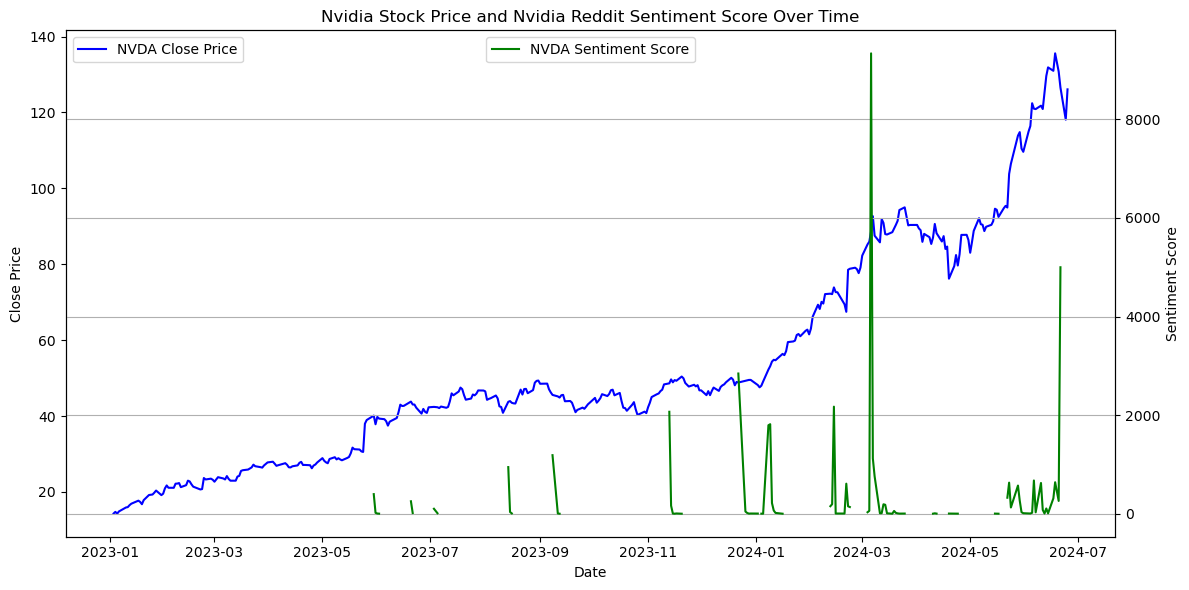

In [201]:
# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the NVDA closing prices
ax1.plot(merged_df['Date'], merged_all['Close'], color='blue', label='NVDA Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for the sentiment scores
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_all['nvda_score'], color='green', label='NVDA Sentiment Score')
ax2.set_ylabel('Sentiment Score', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

# Add a title
plt.title('Nvidia Stock Price and Nvidia Reddit Sentiment Score Over Time')


# Show grid
plt.grid()

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()

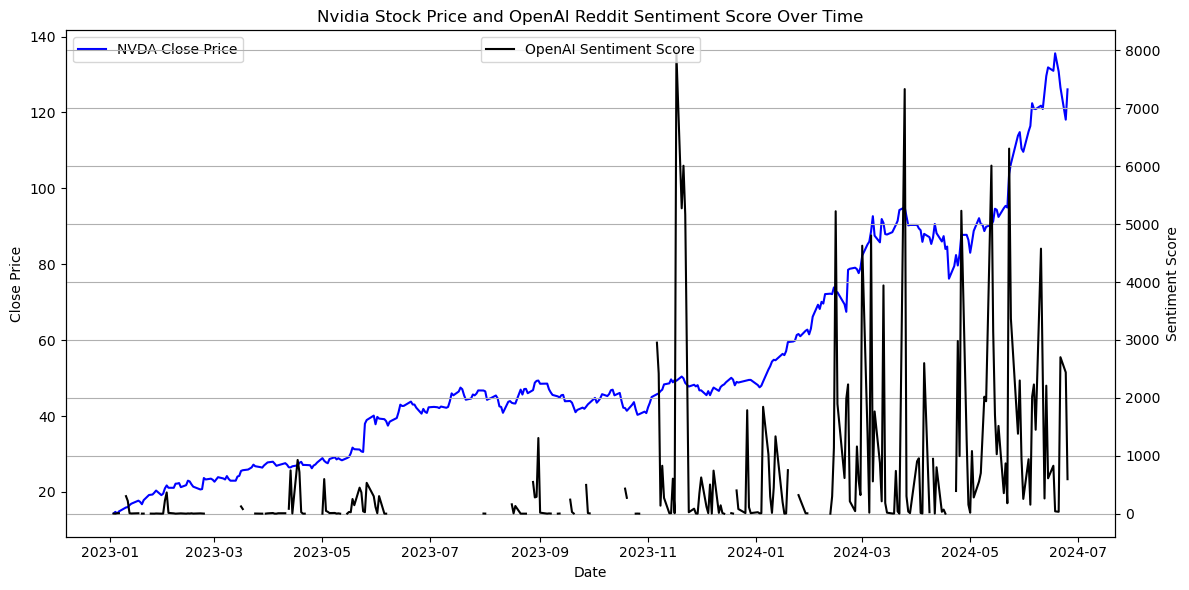

In [267]:
# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the NVDA closing prices
ax1.plot(merged_all['Date'], merged_all['Close'], color='blue', label='NVDA Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for the sentiment scores
ax2 = ax1.twinx()
ax2.plot(merged_all['Date'], merged_all['openai_score'], color='black', label='OpenAI Sentiment Score')
ax2.set_ylabel('Sentiment Score', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

# Add a title
plt.title('Nvidia Stock Price and OpenAI Reddit Sentiment Score Over Time')


# Show grid
plt.grid()

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()

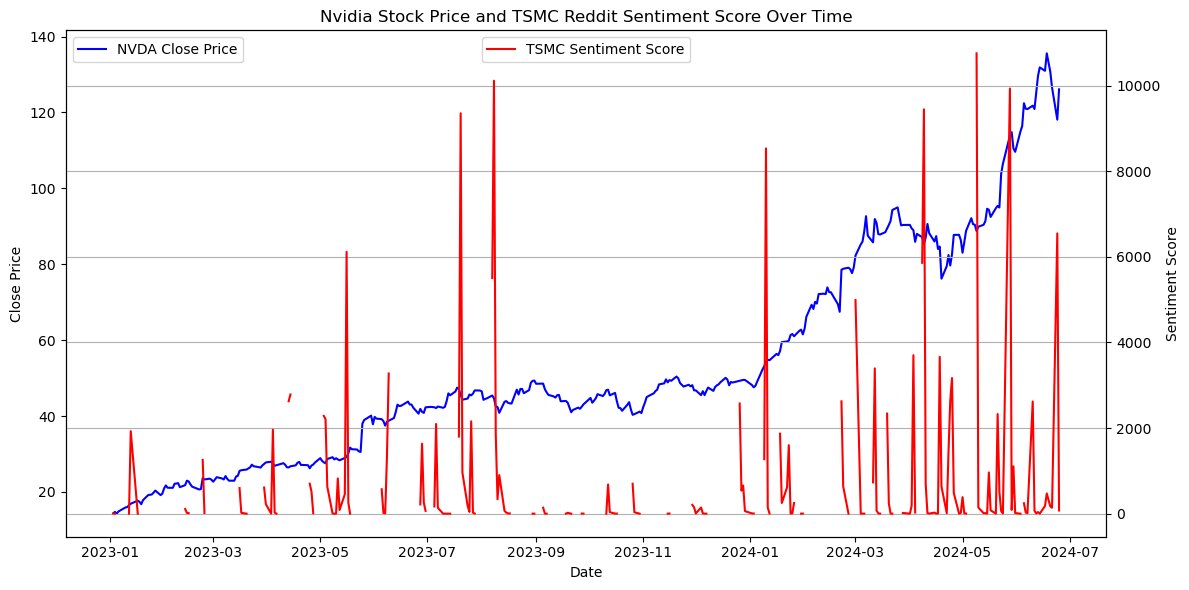

In [202]:
# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the NVDA closing prices
ax1.plot(merged_df['Date'], merged_all['Close'], color='blue', label='NVDA Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for the sentiment scores
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_all['tsmc_score'], color='red', label='TSMC Sentiment Score')
ax2.set_ylabel('Sentiment Score', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

# Add a title
plt.title('Nvidia Stock Price and TSMC Reddit Sentiment Score Over Time')


# Show grid
plt.grid()

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()